# Running Bernulli-RBM

In [2]:
import pandas as pd
from sklearn.neural_network import BernoulliRBM
import numpy as np
import os
%matplotlib inline

In [3]:
def bip():
    os.system("printf '\a'")
    
#def set_trace():
import pdb
from pdb import set_trace as bp

In [4]:
df = pd.read_csv('dataset.csv', usecols=['Date','Open','High','Low','Close','Volume','Adj Close','Stock'])

In [5]:
df = df[:50000]

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Stock
0,2006-01-03,0.710553,0.707904,0.705324,0.714383,5307000,21.399132,A
1,2006-01-04,0.715643,0.716495,0.723974,0.717436,4195800,21.456621,A
2,2006-01-05,0.712250,0.738488,0.726687,0.747286,4835400,22.018748,A
3,2006-01-06,0.747879,0.749485,0.748389,0.753392,6146300,22.133729,A
4,2006-01-09,0.752969,0.749828,0.759580,0.750000,4082800,22.069850,A


## Creating `Day` Column

In [7]:
df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'])
df.loc[:,'Day'] = df.loc[:,'Date'].dt.dayofweek/6

## Creating `return` column

In [59]:
df.loc[:,'Return'] = np.nan

In [69]:
def get_return(group):
    #if group.name != 'A': bp()
    df.loc[(df.loc[:,'Stock'] == group.name) & (df.index != group.index[0]), 'Return'] = (group.loc[:,'Close'].iloc[1:].reset_index(drop=True)/group.loc[:,'Close'].iloc[:-1].reset_index(drop=True)-1).values
    

In [70]:
df.groupby('Stock').apply(get_return);
bip()

In [72]:
df[df['Stock'] == "AGNC"].head()

,Date,Open,High,Low,Close,Volume,Adj Close,Stock,Day,Return
49768,2008-05-15,0.341564,0.287530,0.396133,0.312246,4197900,4.447256,AGNC,0.500000,NaN
49769,2008-05-16,0.326867,0.309322,0.400552,0.349391,1109600,4.594348,AGNC,0.666667,0.118959
49770,2008-05-19,0.364491,0.308111,0.400552,0.321532,329700,4.484029,AGNC,0.000000,-0.079734
49771,2008-05-20,0.340976,0.297215,0.401657,0.312246,110100,4.447256,AGNC,0.166667,-0.028881
49772,2008-05-21,0.328630,0.274818,0.400000,0.306442,300300,4.424272,AGNC,0.333333,-0.018587


In [87]:
print("The number of NaN Returns %smatches the number of stocks" % "" if df['Return'].isnull().sum() == len(df['Stock'].unique()) else "not ")

The number of NaN Returns matches the number of stocks


## Categorizing returns

In [9]:
df.loc[df['Return'] < -0.03,'Y'] = 0
df.loc[(df['Return'] >= -0.03) & (df['Return'] <-0.01),'Y'] = 1
df.loc[(df['Return'] >= -0.01) & (df['Return'] <0.01),'Y'] = 2
df.loc[(df['Return'] >= 0.01) & (df['Return'] <0.03),'Y'] = 3
df.loc[df['Return'] >= 0.03,'Y'] = 4
df.head()

KeyError: 'Return'

In [85]:
df['Y'].describe()

count    1258.000000
mean        2.062798
std         1.270821
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Y, dtype: float64

## Some histogram for fun

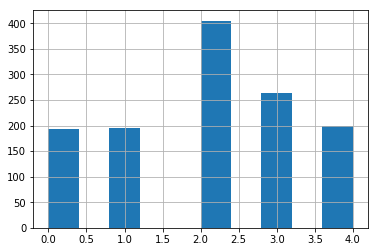

In [65]:
df['Y'].hist()

# Restricted Boltzmann Machine

## Getting X and Y

In [78]:
X = df[df['Return'].isnull == False].loc[:,['Return']]

In [75]:
X

0          0.714383
1          0.717436
2          0.747286
3          0.753392
4          0.750000
5          0.765265
6          0.764925
7          0.738806
8          0.729986
9          0.723202
10         0.746947
11         0.765265
12         0.739824
13         0.739824
14         0.742198
15         0.740502
16         0.735075
17         0.736092
18         0.744912
19         0.728290
20         0.763908
21         0.740502
22         0.742537
23         0.756445
24         0.731343
25         0.749661
26         0.769674
27         0.794776
28         0.746608
29         0.758480
             ...   
1520588    0.955233
1520589    0.907441
1520590    0.892317
1520591    0.935874
1520592    0.978826
1520593    0.938294
1520594    0.984271
1520595    1.000000
1520596    0.966122
1520597    0.988506
1520598    0.996975
1520599    0.943739
1520600    0.942529
1520601    0.949788
1520602    0.932849
1520603    0.869328
1520604    0.875983
1520605    0.808832
1520606    0.807018


In [71]:
rbm = BernoulliRBM()
rbm.fit(df:loc[:,])